<a href="https://colab.research.google.com/github/UttaraKet1607/Malarial-Cell-Image-Segmentation/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download iarunava/cell-images-for-detecting-malaria

 99% 671M/675M [00:06<00:00, 133MB/s]
100% 675M/675M [00:06<00:00, 105MB/s]


In [ ]:
! unzip cell-images-for-detecting-malaria.zip

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/content/cell_images"))

['Parasitized', 'Uninfected', 'cell_images']


In [8]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

In [9]:
parasitized_data = os.listdir('/content/cell_images/Parasitized')
print(parasitized_data[:10]) #the output we get are the .png files

uninfected_data = os.listdir('/content/cell_images/Uninfected/')
print('\n')
print(uninfected_data[:10])

['C157P118ThinF_IMG_20151115_163611_cell_216.png', 'C68P29N_ThinF_IMG_20150819_133236_cell_138.png', 'C132P93ThinF_IMG_20151004_152257_cell_144.png', 'C59P20thinF_IMG_20150803_111244_cell_196.png', 'C80P41ThinF_IMG_20150817_112329_cell_7.png', 'C59P20thinF_IMG_20150803_112802_cell_180.png', 'C68P29N_ThinF_IMG_20150819_134112_cell_108.png', 'C91P52ThinF_IMG_20150821_124504_cell_198.png', 'C119P80ThinF_IMG_20151002_123043_cell_164.png', 'C184P145ThinF_IMG_20151203_103824_cell_150.png']


['C235ThinF_IMG_20151112_164625_cell_159.png', 'C226ThinF_IMG_20151112_131546_cell_166.png', 'C103P64ThinF_IMG_20150918_165016_cell_107.png', 'C160P121ThinF_IMG_20151116_093748_cell_96.png', 'C157P118ThinF_IMG_20151115_164026_cell_221.png', 'C231ThinF_IMG_20151112_153041_cell_35.png', 'C72P33_ThinF_IMG_20150815_104045_cell_163.png', 'C54P15thinF_IMG_20150728_112832_cell_24.png', 'C234ThinF_IMG_20151112_162759_cell_47.png', 'C104P65ThinF_IMG_20150918_172053_cell_184.png']


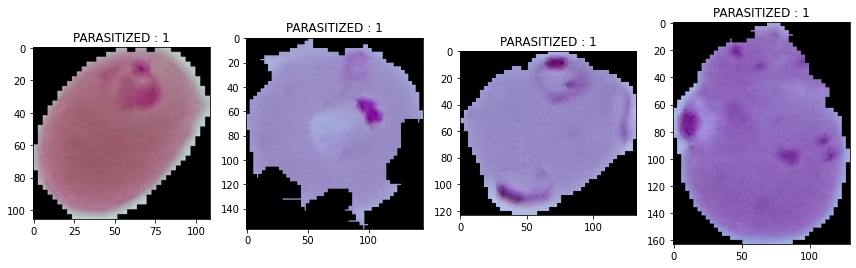

In [15]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

In [14]:
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread('/content/cell_images/Parasitized' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('/content/cell_images/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

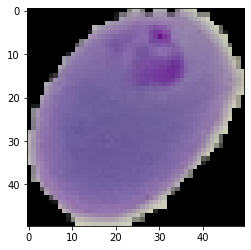

In [16]:
plt.imshow(data[0])
plt.show()

In [17]:
image_data = np.array(data)
labels = np.array(labels)

In [18]:
idx = np.arange(image_data.shape[0])
image_data = image_data[idx]
labels = labels[idx]

In [25]:
image_data.shape, labels.shape

((27558, 50, 50, 3), (27558,))

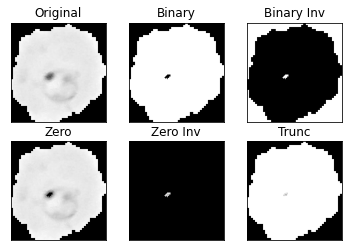

In [31]:
imgpath1 =  "/content/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png"
img = cv2.imread(imgpath1, 0)
th = 0
max_val = 255
    
ret, o1 = cv2.threshold(img, th, max_val, cv2.THRESH_BINARY + cv2.THRESH_OTSU )
ret, o2 = cv2.threshold(img, th, max_val, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU )
ret, o3 = cv2.threshold(img, th, max_val, cv2.THRESH_TOZERO + cv2.THRESH_OTSU )
ret, o4 = cv2.threshold(img, th, max_val, cv2.THRESH_TOZERO_INV + cv2.THRESH_OTSU )
ret, o5 = cv2.threshold(img, th, max_val, cv2.THRESH_TRUNC + cv2.THRESH_OTSU )
    
output = [img, o1, o2, o3, o4, o5]
    
titles = ['Original', 'Binary', 'Binary Inv',
              'Zero', 'Zero Inv', 'Trunc']
    
for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(output[i], cmap='gray')
        plt.title(titles[i])
        plt.xticks([])
        plt.yticks([])

plt.show()  

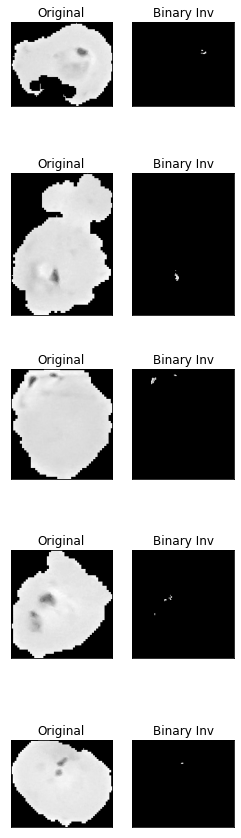

In [36]:
imgpath1 =  "/content/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144348_cell_139.png"
imgpath2 =  "/content/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png"
imgpath3 =  "/content/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png"
imgpath4 =  "/content/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_165.png"
imgpath5 =  "/content/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_167.png"
img1 = cv2.imread(imgpath1, 0)
img2= cv2.imread(imgpath2, 0)
img3 = cv2.imread(imgpath3, 0)
img4 = cv2.imread(imgpath4, 0)
img5 = cv2.imread(imgpath5, 0)
th = 0
max_val = 255
    
ret, o1 = cv2.threshold(img1, th, max_val, cv2.THRESH_TOZERO_INV + cv2.THRESH_OTSU )
ret, o2 = cv2.threshold(img2, th, max_val, cv2.THRESH_TOZERO_INV + cv2.THRESH_OTSU )
ret, o3 = cv2.threshold(img3, th, max_val, cv2.THRESH_TOZERO_INV + cv2.THRESH_OTSU )
ret, o4 = cv2.threshold(img4, th, max_val, cv2.THRESH_TOZERO_INV + cv2.THRESH_OTSU )
ret, o5 = cv2.threshold(img5, th, max_val, cv2.THRESH_TOZERO_INV + cv2.THRESH_OTSU )
    
output = [img1, o1,img2, o2,img3, o3,img4, o4,img5, o5]
    
titles = ['Original', 'Binary Inv', 'Original', 'Binary Inv','Original', 'Binary Inv','Original', 'Binary Inv','Original', 'Binary Inv']
    
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4,16)    
for i in range(10):
        plt.subplot(5, 2, i+1)
        plt.imshow(output[i], cmap='gray')
        plt.title(titles[i])
        plt.xticks([])
        plt.yticks([])

plt.show() 

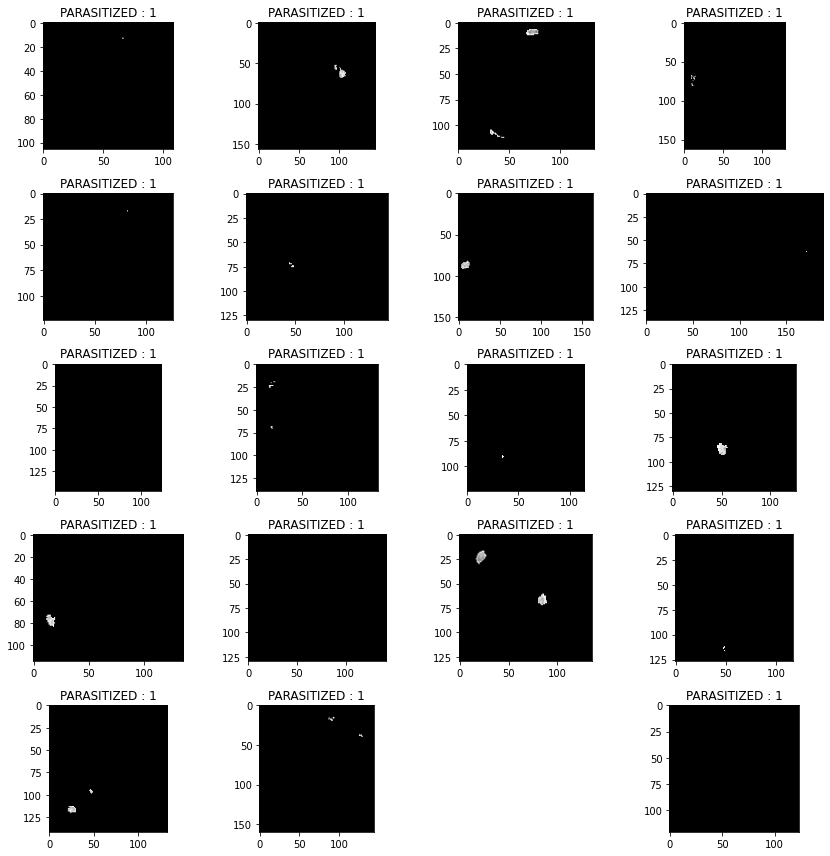

In [44]:
plt.figure(figsize = (12,12))
for i in range(20):
    plt.subplot(5, 4, i+1)
    img = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i],0)
    ret, o6 = cv2.threshold(img, th, max_val, cv2.THRESH_TOZERO_INV + cv2.THRESH_OTSU )
    plt.imshow(o6, cmap='gray')
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()